# DAAA1B07 P2222840 Denzel See DAVI CA2

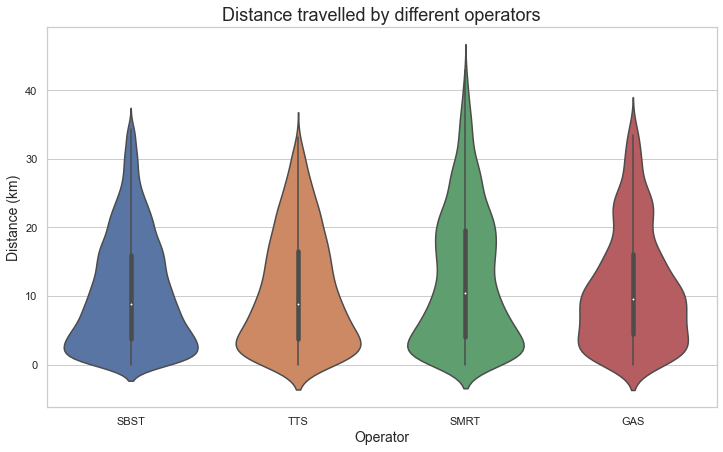

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("DAVICA2/bus_routes.csv")
data.dropna()
data.drop_duplicates()
drop = ['WD_FirstBus','WD_LastBus','SAT_FirstBus','SAT_LastBus','SUN_FirstBus','SUN_LastBus']
data = data.drop(drop, axis=1)
# SBST
SBST=data[data['Operator']=="SBST"]
IQR = SBST['Distance'].quantile(0.75)-SBST['Distance'].quantile(0.25)
Q3 = SBST['Distance'].quantile(0.75)
SBST = SBST[SBST['Distance'] < Q3+1.5*IQR]
# TTS
TTS=data[data['Operator']=="TTS"]
IQR = TTS['Distance'].quantile(0.75)-TTS['Distance'].quantile(0.25)
Q3 = TTS['Distance'].quantile(0.75)
TTS = TTS[TTS['Distance'] < Q3+1.5*IQR]
# SMRT
SMRT=data[data['Operator']=="SMRT"]
IQR = SMRT['Distance'].quantile(0.75)-SMRT['Distance'].quantile(0.25)
Q3 = SMRT['Distance'].quantile(0.75)
SMRT = SMRT[SMRT['Distance'] < Q3+1.5*IQR]
# GAS
GAS=data[data['Operator']=="GAS"]
IQR = GAS['Distance'].quantile(0.75)-GAS['Distance'].quantile(0.25)
Q3 = GAS['Distance'].quantile(0.75)
GAS = GAS[GAS['Distance'] < Q3+1.5*IQR]

data = pd.concat([SBST,TTS,SMRT,GAS])
sns.set(style='whitegrid')
plt.figure(figsize=(12,7))
sns.violinplot(x='Operator',y='Distance',data=data,legend=False)
plt.title("Distance travelled by different operators",font={'size':18})
plt.xlabel("Operator",font={'size':14})
plt.ylabel("Distance (km)",font={'size':14})

plt.show()

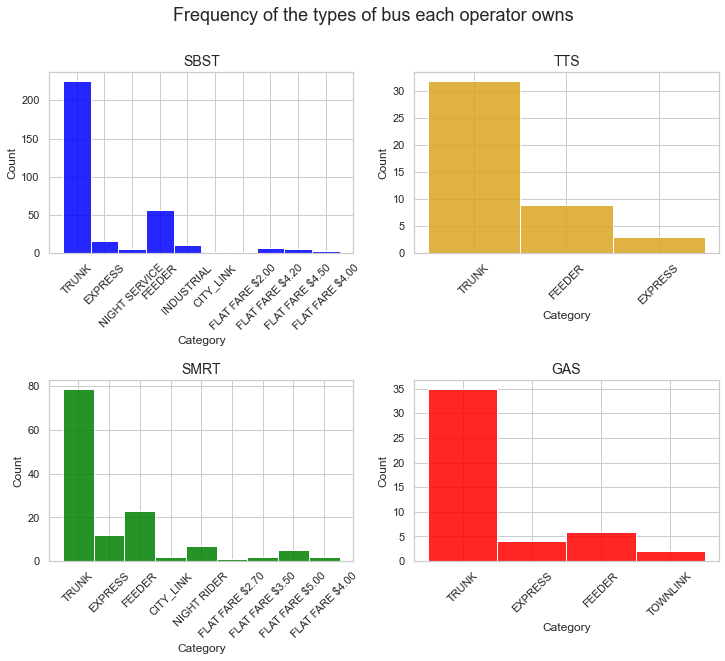

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("DAVICA2/bus_services.csv",index_col=0)

data=data.drop_duplicates()
data = data[data['Direction'] == 1]
drop = ['AM_Peak_Freq','AM_Offpeak_Freq','PM_Peak_Freq','PM_Offpeak_Freq','LoopDesc']
data = data.drop(drop, axis=1)

dataGAS = data[data['Operator'] == 'GAS']
dataSBST = data[data['Operator'] == 'SBST']
dataSMRT = data[data['Operator'] == 'SMRT']
dataTTS = data[data['Operator'] == 'TTS']

plt.figure(figsize=(12,9))
sns.set(style='whitegrid')
plt.suptitle('Frequency of the types of bus each operator owns',fontsize=18)
plt.subplot(221)
sns.histplot(dataSBST['Category'],color="blue",alpha=0.85)
plt.xticks(rotation=45)
plt.title("SBST",font={'size':14})

plt.subplot(222)
sns.histplot(dataTTS['Category'],color="#DAA520",alpha=0.85)
plt.xticks(rotation=45)
plt.title("TTS",font={'size':14})

plt.subplot(223)
sns.histplot(dataSMRT['Category'],color="green",alpha=0.85)
plt.xticks(rotation=45)
plt.title("SMRT",font={'size':14})

plt.subplot(224)
sns.histplot(dataGAS['Category'],color="red",alpha=0.85)
plt.xticks(rotation=45)
plt.title("GAS",font={'size':14})

plt.subplots_adjust(hspace=0.7)
plt.show()

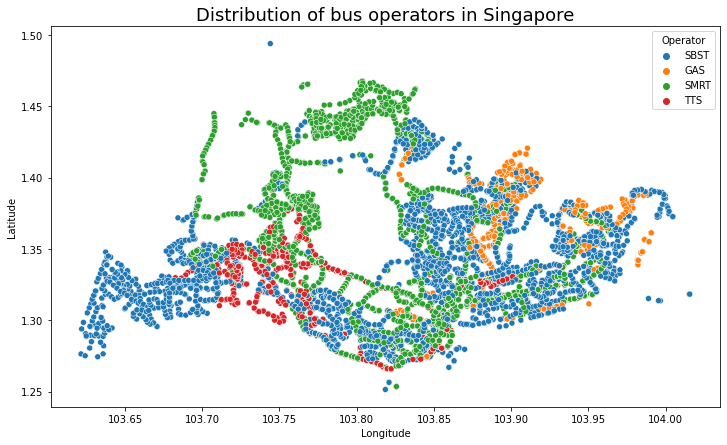

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

datastop = pd.read_csv("DAVICA2/bus_stops.csv", index_col=0)
dataroutes = pd.read_csv("DAVICA2/bus_routes.csv", index_col=0)
dataroutes = dataroutes[dataroutes['Direction'] == 1]
drop = ['ServiceNo','Direction','StopSequence','Distance','WD_FirstBus','WD_LastBus','SAT_FirstBus','SAT_LastBus','SUN_FirstBus','SUN_LastBus']
dataroutes = dataroutes.drop(drop, axis=1)
dataroutes['BusStopCode'] = pd.to_numeric(dataroutes['BusStopCode'], downcast='integer')
df = pd.merge(dataroutes,datastop, on='BusStopCode')
df = df.drop_duplicates()

plt.figure(figsize=(12,7))
plt.title('Distribution of bus operators in Singapore',font={'size':18})
sns.scatterplot(x='Longitude',y='Latitude',hue='Operator',data=df)
plt.show()

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter("ignore", FutureWarning)
%matplotlib inline

data = pd.read_csv("DAVICA2/public-transport-utilisation-average-public-transport-ridership.csv")
data = data[data['year'].isin([1995,1996,2000,2001,2005,2006,2010,2011,2015,2016])]

datafig = px.sunburst(data, path=['year', 'type_of_public_transport'], values='average_ridership',color='type_of_public_transport')
datafig.update_layout(title={'text': 'Sunburst plot of average ridership of Singapore\'s public transport','font': {'size': 20}},margin=dict(r=300,t=100,b=20))
datafig.show()


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

datatrain = pd.read_csv("DAVICA2/fares-for-mrt-and-lrt-effective-from-26-december-2022.csv")
databus = pd.read_csv("DAVICA2/fares-for-trunk-bus-services-effective-from-26-december-2022.csv")
datatrain = datatrain[datatrain['fare_type'].isin(['Adult card fare'])]
keep = ['distance','adult_card_fare_per_ride','adult_cash_fare_per_ride']
databus = databus[keep]
databus = databus.rename(columns={'adult_card_fare_per_ride': 'Bus Adult card fare','adult_cash_fare_per_ride':'Bus Adult cash fare'})
databus = databus.reset_index(drop=True)
data745=datatrain[datatrain['applicable_time']=="Before 7.45am  (Weekdays excluding public holidays)"]
dataall=datatrain[datatrain['applicable_time']=="All other timings"]
dataall = dataall.reset_index(drop=True)
df = pd.DataFrame({'distance':datatrain['distance'],'Adult Train Before 7.45':data745['fare_per_ride'],'Adult Train All Timings':dataall['fare_per_ride'],'Bus Adult Card':databus['Bus Adult card fare'],'Bus Adult cash':databus['Bus Adult cash fare']},index=None)
df = df.iloc[:39].reset_index(drop=True)
fig = px.line(df, x='distance', y=['Adult Train Before 7.45','Adult Train All Timings','Bus Adult Card','Bus Adult cash'])
fig.update_layout(yaxis_title='Fare in Cents')
fig.show()

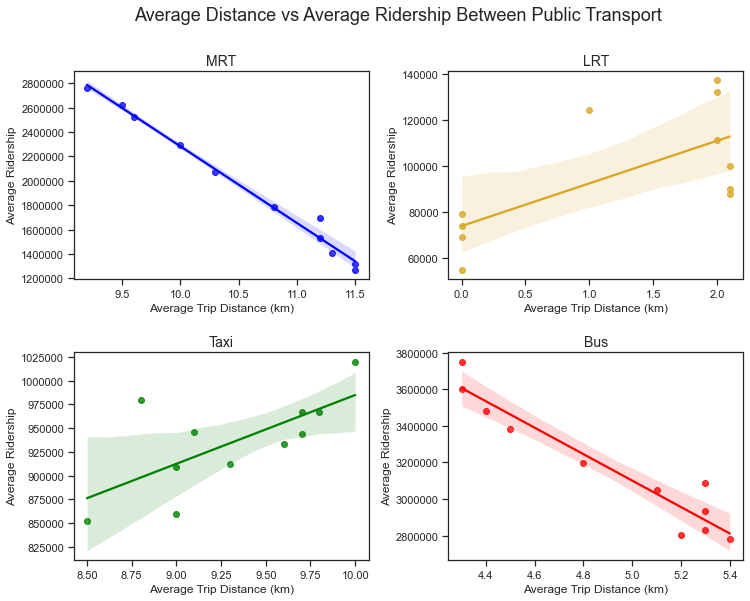

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

datadist = pd.read_csv("DAVICA2/public-transport-utilisation-average-trip-distance.csv")
dataride = pd.read_csv("DAVICA2/public-transport-utilisation-average-public-transport-ridership.csv")

dataride = dataride.loc[(dataride['year']>=2004) & (dataride['year']<=2014)]
dataride = dataride.rename(columns={'type_of_public_transport': 'mode'})
dataride = dataride.reset_index(drop=True)
df = pd.merge(dataride,datadist, on=['year','mode'])
# Did not put all in one scatterplot since data between mode differs too much thus each data does not look impactful
dfmrt = df[df['mode']=='MRT']
dflrt = df[df['mode']=='LRT']
dftaxi = df[df['mode']=='Taxi']
dfbus = df[df['mode']=='Bus']

plt.figure(figsize=(12,9))
plt.suptitle('Average Distance vs Average Ridership Between Public Transport',fontsize=18)
plt.subplot(221)
sns.regplot(data=dfmrt,x="ave_distance_per_trip",y="average_ridership",color="blue")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Average Trip Distance (km)")
plt.ylabel("Average Ridership")
plt.title("MRT",font={'size':14})

plt.subplot(222)
sns.regplot(data=dflrt,x="ave_distance_per_trip",y="average_ridership",color="#DAA520")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Average Trip Distance (km)")
plt.ylabel("Average Ridership")
plt.title("LRT",font={'size':14})

plt.subplot(223)
sns.regplot(data=dftaxi,x="ave_distance_per_trip",y="average_ridership",color="green")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Average Trip Distance (km)")
plt.ylabel("Average Ridership")
plt.title("Taxi",font={'size':14})

plt.subplot(224)
sns.regplot(data=dfbus,x="ave_distance_per_trip",y="average_ridership",color="red")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Average Trip Distance (km)")
plt.ylabel("Average Ridership")
plt.title("Bus",font={'size':14})

plt.subplots_adjust(wspace=0.27,hspace=0.35)
plt.show()